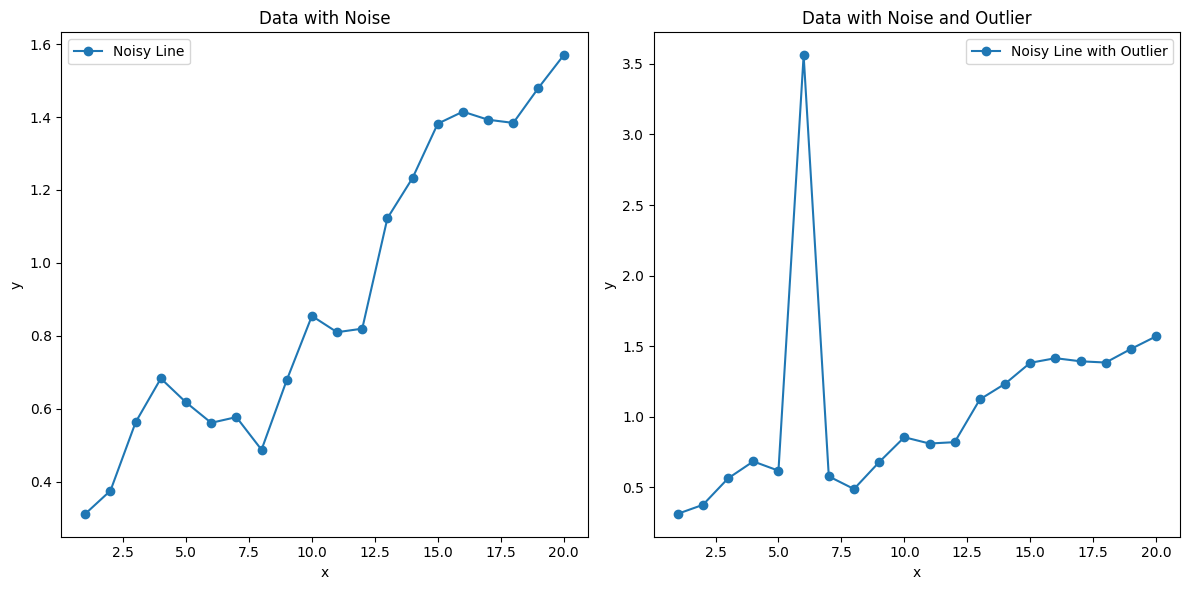

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the files
y_line = np.loadtxt('data/y_line.txt')
y_outlier_line = np.loadtxt('data/y_outlier_line.txt')

# Assume sequential data, so we can use the index as x.
x = np.arange(1, len(y_line) + 1)

# Visualise the data.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y_line, 'o-', label='Noisy Line')
plt.title('Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_outlier_line, 'o-', label='Noisy Line with Outlier')
plt.title('Data with Noise and Outlier')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


In [2]:
from scipy.optimize import minimize

# Define the objective functions for l1 and l2 minimisation
def l1_norm(params, x, y):
    a, b = params
    return np.sum(np.abs(a * x + b - y))

def l2_norm(params, x, y):
    a, b = params
    return np.sum((a * x + b - y) ** 2)

# Initial guess for parameters a and b.
initial_params = [0, 0]

# Perform minimisation for y_line.
result_l1_y_line = minimize(l1_norm, initial_params, args=(x, y_line), method='SLSQP')
result_l2_y_line = minimize(l2_norm, initial_params, args=(x, y_line), method='SLSQP')

# Perform minimisation for y_outlier_line.
result_l1_y_outlier_line = minimize(l1_norm, initial_params, args=(x, y_outlier_line), method='SLSQP')
result_l2_y_outlier_line = minimize(l2_norm, initial_params, args=(x, y_outlier_line), method='SLSQP')

# Store the results in a dictionary.
results = {
    "l1_y_line": result_l1_y_line.x,
    "l2_y_line": result_l2_y_line.x,
    "l1_y_outlier_line": result_l1_y_outlier_line.x,
    "l2_y_outlier_line": result_l2_y_outlier_line.x
}
results


{'l1_y_line': array([0.06632614, 0.242867  ]),
 'l2_y_line': array([0.06654307, 0.21721691]),
 'l1_y_outlier_line': array([0.0661826 , 0.24578665]),
 'l2_y_outlier_line': array([0.04624232, 0.58037479])}

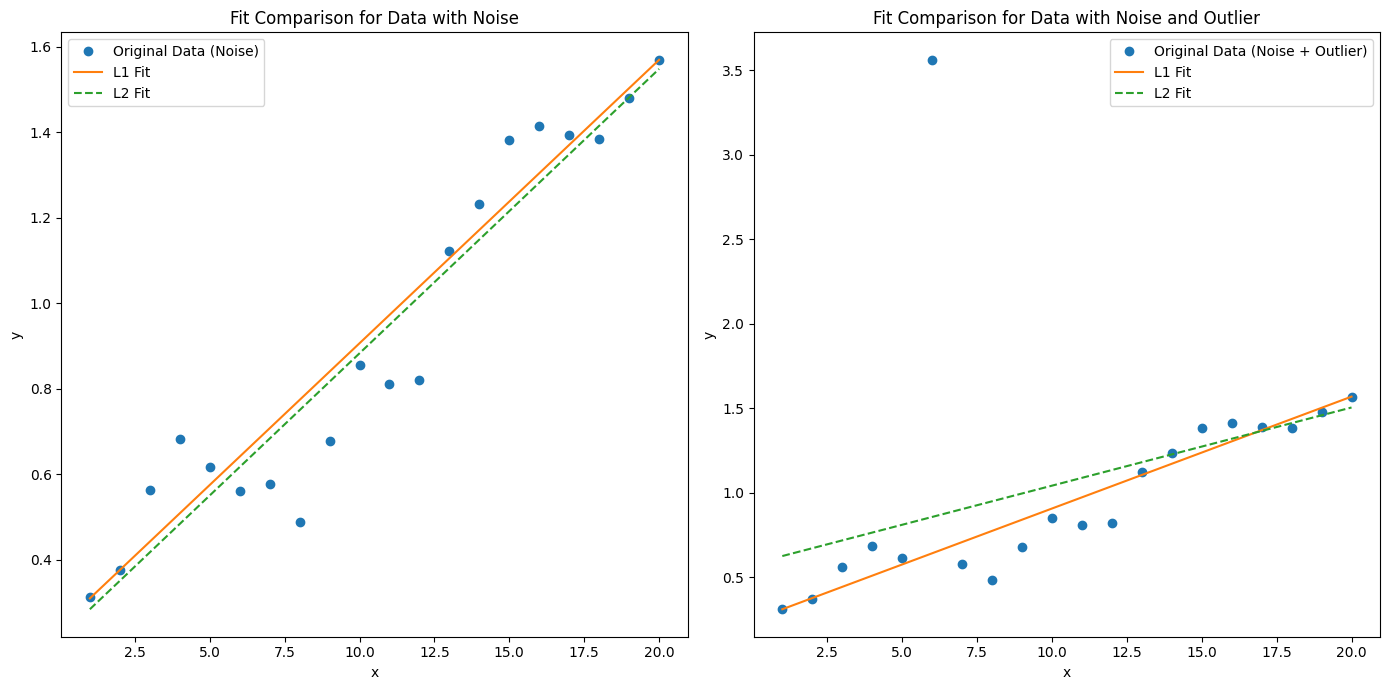

In [3]:
# Define the line equations using the optimized parameters
def line_eq(x, alpha):
    return alpha[0] * x + alpha[1]

# Generate lines for plotting
y_line_l1_fit = line_eq(x, results['l1_y_line'])
y_line_l2_fit = line_eq(x, results['l2_y_line'])
y_outlier_line_l1_fit = line_eq(x, results['l1_y_outlier_line'])
y_outlier_line_l2_fit = line_eq(x, results['l2_y_outlier_line'])

# Plotting the fitted lines along with the original data.
plt.figure(figsize=(14, 7))

# Plot for y_line data.
plt.subplot(1, 2, 1)
plt.plot(x, y_line, 'o', label='Original Data (Noise)')
plt.plot(x, y_line_l1_fit, '-', label='L1 Fit')
plt.plot(x, y_line_l2_fit, '--', label='L2 Fit')
plt.title('Fit Comparison for Data with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot for y_outlier_line data.
plt.subplot(1, 2, 2)
plt.plot(x, y_outlier_line, 'o', label='Original Data (Noise + Outlier)')
plt.plot(x, y_outlier_line_l1_fit, '-', label='L1 Fit')
plt.plot(x, y_outlier_line_l2_fit, '--', label='L2 Fit')
plt.title('Fit Comparison for Data with Noise and Outlier')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
